In [1]:
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df_insurance = pd.read_csv("insurance.csv")
display(df_insurance)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
conn = duckdb.connect()

df = conn.execute('''
    SELECT 
        * 
    FROM read_csv_auto('insurance.csv')
''').df()

conn.register("insurance", df)

display(conn.execute('SHOW TABLES').df())

,name
0,insurance


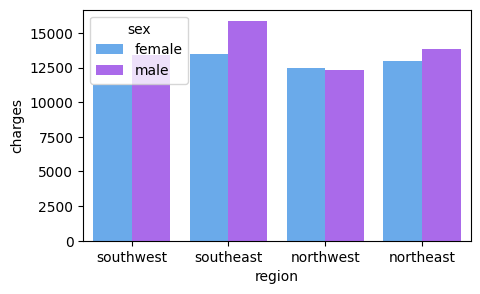

In [4]:
f, ax = plt.subplots(1, 1, figsize = (5, 3))
df = conn.execute('''
    SELECT
        *
    FROM insurance
''').df()

ax = sns.barplot(x = 'region',
                 y = 'charges',
                 hue = 'sex',
                 data = df,
                 palette = 'cool',
                 errorbar = None)

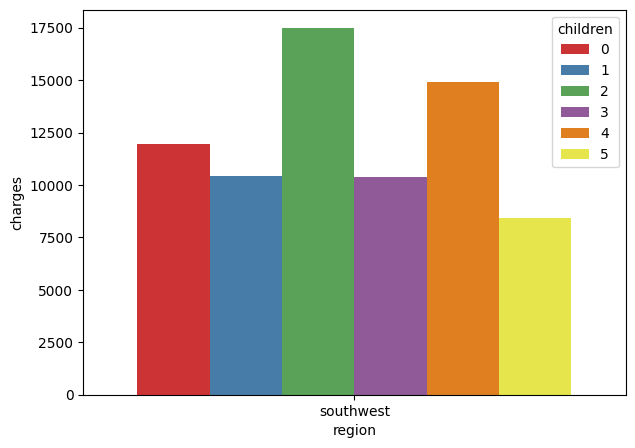

In [5]:
f, ax = plt.subplots(1, 1, figsize = (7, 5))
df = conn.execute('''
    SELECT
        *
    FROM insurance
    WHERE region = 'southwest'
''').df()

ax = sns.barplot(x = 'region',
                 y = 'charges',
                 hue = 'children',
                 data = df,
                 palette = 'Set1',
                 errorbar = None)

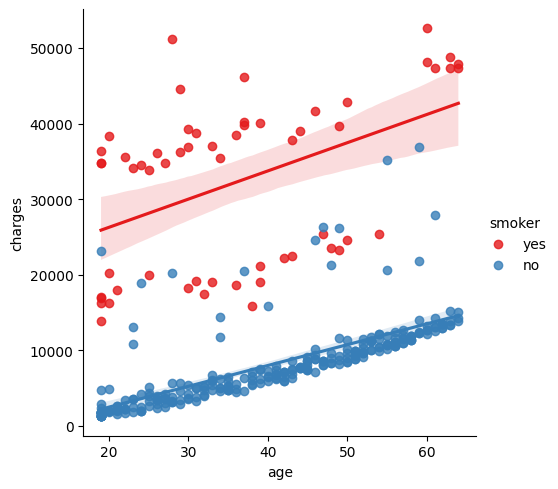

In [6]:
ax = sns.lmplot(x = 'age',
                y = 'charges',
                data = df,
                hue = 'smoker',
                palette = 'Set1')

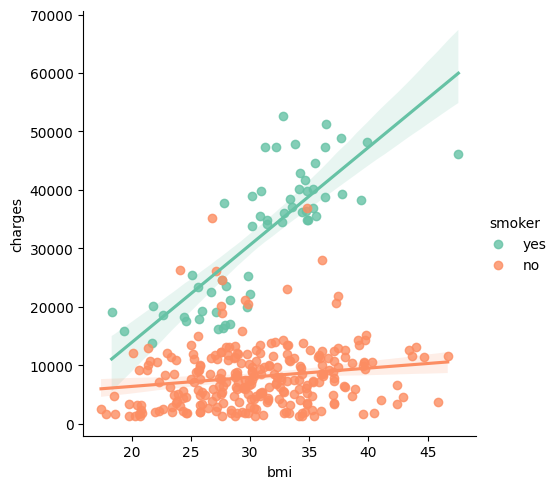

In [7]:
ax = sns.lmplot(x = 'bmi',
                y = 'charges',
                data = df,
                hue = 'smoker',
                palette = 'Set2')

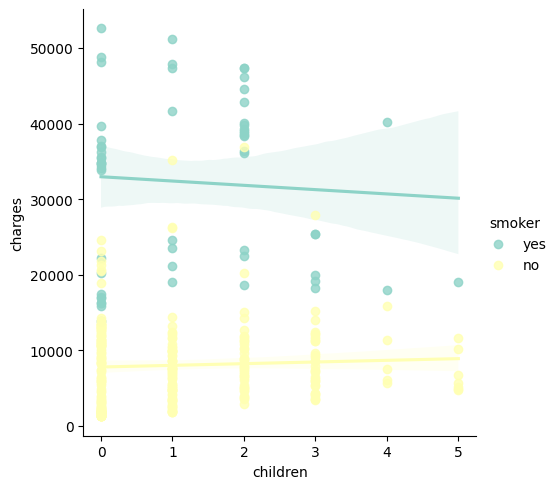

In [8]:
ax = sns.lmplot(x = 'children',
                y = 'charges',
                data = df,
                hue = 'smoker',
                palette = 'Set3')

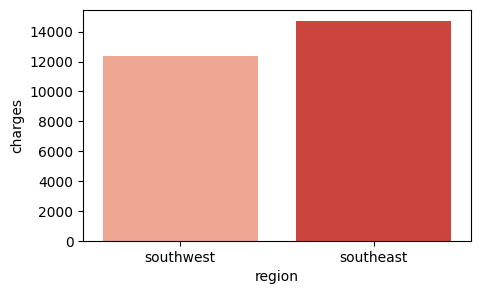

In [9]:
df = conn.execute('''
    SELECT 
        region,
        mean(charges) as charges
    FROM insurance
    WHERE region = 'southwest' or
          region = 'southeast'
    GROUP BY region
''').df()

f, ax = plt.subplots (1, 1, figsize = (5, 3))
ax = sns.barplot(x = 'region',
                 y = 'charges',
                 data = df,
                 palette = 'Reds')

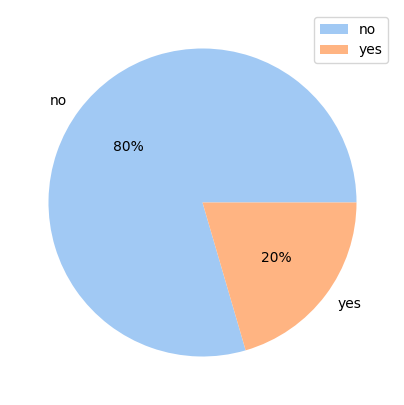

In [10]:
palette_color = \
    sns.color_palette('pastel')
plt.figure (figsize = (5, 5))

df = conn.execute ('''
    SELECT count (*) as Count,
           smoker
    FROM insurance
    GROUP BY smoker
    ORDER BY Count DESC
''').df()

plt.pie('Count',
        labels = 'smoker',
        colors = palette_color,
        data = df,
        autopct = '%.0f%%',)

plt.legend(df['smoker'], loc="best")

In [11]:
# sum up total number of people
total = df['Count'].sum()

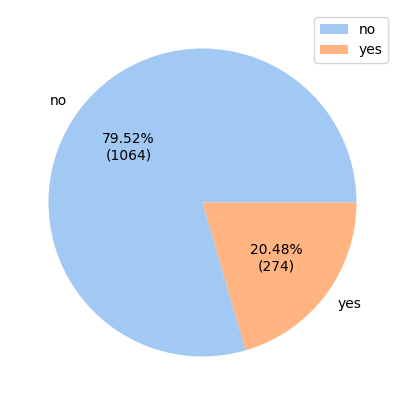

In [12]:
def fmt(x):
    # display percentage followed by number
    return '{:.2f}%\n({:.0f})'.format(
        x, total * x / 100)
    
palette_color = \
    sns.color_palette('pastel')
plt.figure(figsize = (5, 5))

plt.pie('Count',
        labels = 'smoker',
        colors = palette_color,
        data = df,
        autopct = fmt) # call fmt ()
        
plt.legend(df['smoker'], loc="best")